# Exercise 4- Dask

## Task 0. Completed by: Alvaro Gonzalez

# Section D-Dask dataframes
NYC area flight data (19 points)

## 1. Install import

In [1]:
import os
import dask
from dask.distributed import Client
import dask.dataframe as dd
import pandas as pd
import glob

## 2. Get the data and read it

In [2]:
filename=os.path.join('nycflights','*.csv')
filename
#read the file dask dataframe
ddf=dd.read_csv(filename)
#read as pandas dataframe
pdf=pd.concat(map(pd.read_csv,glob.glob(filename)))

## 3. Lazy operations

In [3]:
#dask don't compute unless it is specified
ddf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
ddf.head()
#or call .compute()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


## 4. Ans: Timing exercises

In [5]:
#time the dask df creation
%timeit  ddf=dd.read_csv(filename)

8.28 ms ± 559 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
#time the pandas df creation
%timeit pdf=pd.concat(map(pd.read_csv,glob.glob(filename)))

2.92 s ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 5. DataFrame atributes

In [7]:
#print column names 
print(ddf.columns)
#print data types
print(ddf.dtypes)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted           

## 6. Ans.Fix data types 

In [8]:
#read again file changing types
ddf=dd.read_csv(filename,
                    parse_dates={'Date':[0,1,2]},
                    dtype={'CRSElapsedTime':'float64',
                    'TailNum':'object'})
print('length',len(ddf))
#verify the new column added
ddf.tail(10)



length 2611892


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269171,1999-12-22,3,1640.0,1645,1904.0,1901,UA,1753,N519UA,264.0,...,228.0,3.0,-5.0,LGA,DEN,1619.0,16.0,20.0,0,0
269172,1999-12-23,4,1648.0,1645,1840.0,1901,UA,1753,N525UA,232.0,...,215.0,-21.0,3.0,LGA,DEN,1619.0,7.0,10.0,0,0
269173,1999-12-24,5,1650.0,1645,1832.0,1901,UA,1753,N527UA,222.0,...,199.0,-29.0,5.0,LGA,DEN,1619.0,6.0,17.0,0,0
269174,1999-12-25,6,1640.0,1645,1850.0,1901,UA,1753,N555UA,250.0,...,222.0,-11.0,-5.0,LGA,DEN,1619.0,10.0,18.0,0,0
269175,1999-12-26,7,1646.0,1645,1903.0,1901,UA,1753,N509UA,257.0,...,230.0,2.0,1.0,LGA,DEN,1619.0,7.0,20.0,0,0
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,0,0


In [9]:
# Verify dtypes
ddf[['CRSElapsedTime','TailNum']].sample(frac=0.001).compute()

,CRSElapsedTime,TailNum
103445,118.0,NaN
190908,376.0,NaN
268604,113.0,NaN
32649,247.0,NaN
151088,135.0,NaN
...,...,...
174818,66.0,N13881
181713,379.0,UNKNOW
205369,157.0,N927TW
7700,144.0,N251AA


## 7. Indexing and Series in Dask

In [10]:
#Single row as Dask series
ddf['TailNum'].compute()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
269176    N516UA
269177    N504UA
269178    N592UA
269179    N575UA
269180    N539UA
Name: TailNum, Length: 2611892, dtype: object

In [11]:
#indexing with Loc for labels index
ddf.loc[ddf['ArrTime']<ddf['ArrTime'].mean()].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
88,1990-01-01,1,1205.0,1110,1343.0,1243,US,49,NaN,98.0,...,NaN,60.0,55.0,LGA,CLE,418.0,NaN,NaN,0,0
89,1990-01-02,2,1158.0,1110,1327.0,1243,US,49,NaN,89.0,...,NaN,44.0,48.0,LGA,CLE,418.0,NaN,NaN,0,0
90,1990-01-03,3,1202.0,1110,1324.0,1243,US,49,NaN,82.0,...,NaN,41.0,52.0,LGA,CLE,418.0,NaN,NaN,0,0
91,1990-01-06,6,1126.0,1110,1322.0,1243,US,49,NaN,116.0,...,NaN,39.0,16.0,LGA,CLE,418.0,NaN,NaN,0,0
92,1990-01-07,7,1114.0,1110,1236.0,1243,US,49,NaN,82.0,...,NaN,-7.0,4.0,LGA,CLE,418.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269146,1999-12-27,1,1102.0,1100,1305.0,1311,UA,1685,N515UA,243.0,...,208.0,-6.0,2.0,LGA,DEN,1619.0,10.0,25.0,0,0
269147,1999-12-28,2,1058.0,1100,1305.0,1311,UA,1685,N598UA,247.0,...,221.0,-6.0,-2.0,LGA,DEN,1619.0,6.0,20.0,0,0
269148,1999-12-29,3,1057.0,1100,1308.0,1311,UA,1685,N517UA,251.0,...,218.0,-3.0,-3.0,LGA,DEN,1619.0,5.0,28.0,0,0
269149,1999-12-30,4,1056.0,1100,1312.0,1311,UA,1685,N502UA,256.0,...,227.0,1.0,-4.0,LGA,DEN,1619.0,6.0,23.0,0,0


In [12]:
#Use indexing with iloc is not useful for rows
ddf.iloc[:,[1,3,]].compute()

#ddf.iloc[[1,3,]].compute()
# #NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

,DayOfWeek,CRSDepTime
0,1,1540
1,2,1540
2,3,1540
3,4,1540
4,5,1540
...,...,...
269176,1,1645
269177,2,1645
269178,3,1645
269179,4,1645


## 8. From pandas to Dask

In [13]:
#partitions of a pandas dataframe to create a dask dataframe
ddf_partitions=dd.from_pandas(pdf,npartitions=10)
ddf_partitions.partitions[1].compute()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
26119,1995,2,28,2,NaN,745,NaN,1225,AA,1785,...,108.0,NaN,NaN,JFK,SJU,1597.0,6.0,15.0,1,0
26119,1993,2,1,1,1717.0,1720,1852.0,1919,NW,429,...,NaN,-27.0,-3.0,EWR,DTW,487.0,NaN,NaN,0,0
26119,1998,2,24,2,1809.0,1655,2052.0,1954,US,1481,...,131.0,58.0,74.0,LGA,MCO,950.0,3.0,29.0,0,0
26119,1999,2,19,5,1059.0,1105,1334.0,1313,CO,1179,...,175.0,21.0,-6.0,EWR,MCI,1092.0,4.0,36.0,0,0
26119,1997,2,28,5,926.0,915,1028.0,1019,US,423,...,42.0,9.0,11.0,LGA,SYR,198.0,2.0,18.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52237,1996,3,25,1,630.0,630,915.0,925,DL,527,...,208.0,-10.0,0.0,LGA,DFW,1389.0,5.0,12.0,0,0
52237,1993,3,31,3,1512.0,1505,1821.0,1755,DL,181,...,NaN,26.0,7.0,LGA,PBI,1035.0,NaN,NaN,0,0
52237,1990,3,2,5,739.0,740,848.0,858,TW,383,...,NaN,-10.0,-1.0,LGA,IAD,229.0,NaN,NaN,0,0
52237,1995,3,26,7,1149.0,1100,1301.0,1219,AA,317,...,110.0,42.0,49.0,LGA,ORD,733.0,5.0,17.0,0,0


## 9. Computations on Dask Dataframes

### 9a. Number of non-missing values in each column

In [14]:
ddf.notnull().sum().compute()

Date                 2611892
DayOfWeek            2611892
DepTime              2540961
CRSDepTime           2611892
ArrTime              2533682
CRSArrTime           2611892
UniqueCarrier        2611892
FlightNum            2611892
TailNum              1298886
ActualElapsedTime    2533682
CRSElapsedTime       2609927
AirTime              1255069
ArrDelay             2533682
DepDelay             2540961
Origin               2611892
Dest                 2611892
Distance             2610397
TaxiIn               1298886
TaxiOut              1298886
Cancelled            2611892
Diverted             2611892
dtype: int64

### 9b. Counts of Categorical values in 'Cancelled'

In [15]:
ddf['Cancelled'].value_counts().compute()

0    2540961
1      70931
Name: Cancelled, dtype: int64

### 9c. Max value of DepDelay

In [16]:
ddf['DepDelay'].max().compute()

1435.0

### 9d. Rows where flights cancelled

In [17]:
ddf[ddf['Cancelled']==1].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
37,1990-01-08,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
55,1990-01-29,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
61,1990-01-04,4,NaN,1850,NaN,1948,US,42,NaN,NaN,...,NaN,NaN,NaN,EWR,SYR,194.0,NaN,NaN,1,0
207,1990-01-01,1,NaN,645,NaN,850,US,93,NaN,NaN,...,NaN,NaN,NaN,LGA,IND,659.0,NaN,NaN,1,0
259,1990-01-25,4,NaN,1755,NaN,1942,US,105,NaN,NaN,...,NaN,NaN,NaN,JFK,PIT,340.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1999-12-20,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,...,NaN,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,1,0
269031,1999-12-16,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269093,1999-12-14,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269153,1999-12-17,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0


### 9e. How many observations Day of  week= 1

In [18]:
ddf[ddf['DayOfWeek']==1].shape[0].compute()

388011

### 9f. in total , how many non-cancelled from each origin

In [19]:
ddf[ddf['Cancelled']==0]['Origin'].value_counts().compute()

EWR    1139451
LGA     974267
JFK     427243
Name: Origin, dtype: int64

  ##### 9fa. Ratio of non cancceled

In [20]:
ddf[ddf['Cancelled']==0]['Origin'].value_counts(normalize=True).compute()

EWR    0.448433
LGA    0.383425
JFK    0.168142
Name: Origin, dtype: float64

### 9g. Average departure delay from each origin by day of week

In [21]:
ddf[['Origin','DayOfWeek','DepDelay']].groupby(['Origin','DayOfWeek']).mean().compute()

DepDelay
Origin DayOfWeek           
EWR    1           9.115922
       2           9.179402
       3          10.606154
       4          12.069740
       5          13.154202
       6           8.053139
       7           9.432185
JFK    1           8.884113
       2           8.841036
       3           9.448858
       4          10.846967
       5          12.339922
       6          11.191893
       7          10.947545
LGA    1           6.580465
       2           6.659778
       3           7.311600
       4           8.620151
       5           9.151866
       6           5.800159
       7           7.589457

### 9h. Mean of columns for each destination

In [22]:
ddf[ddf['Dest'].isin(['LGA','JFK','EWR'])].groupby(['Dest']).mean().compute()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Dest,,,,,,,,,,,,,,,,
EWR,3.838710,1216.100000,885.483871,1068.833333,845.612903,559.225806,45.166667,32.233333,27.777778,34.583333,23.766667,19.064516,7.111111,23.666667,0.032258,0.193548
LGA,4.625000,1313.500000,795.000000,1164.833333,821.375000,2310.500000,37.500000,31.125000,8.800000,25.500000,37.000000,14.750000,7.200000,18.400000,0.000000,0.250000
JFK,5.166667,1652.166667,1679.833333,1765.000000,1731.666667,1009.666667,59.500000,30.166667,19.500000,114.166667,84.833333,17.666667,7.000000,18.500000,0.000000,0.000000


### 9i. Max Values of ActualElapsedTime and distance per year

In [23]:
ddf[['ActualElapsedTime','Distance']].groupby(ddf.Date.dt.year).max().compute()

,ActualElapsedTime,Distance
Date,,
1990,595.0,2586.0
1991,632.0,2586.0
1992,703.0,2586.0
1993,675.0,2586.0
1994,647.0,2586.0
1995,581.0,2586.0
1996,620.0,2586.0
1997,587.0,2586.0
1998,743.0,4962.0


## 10. Vizualizing Dask Task Graph

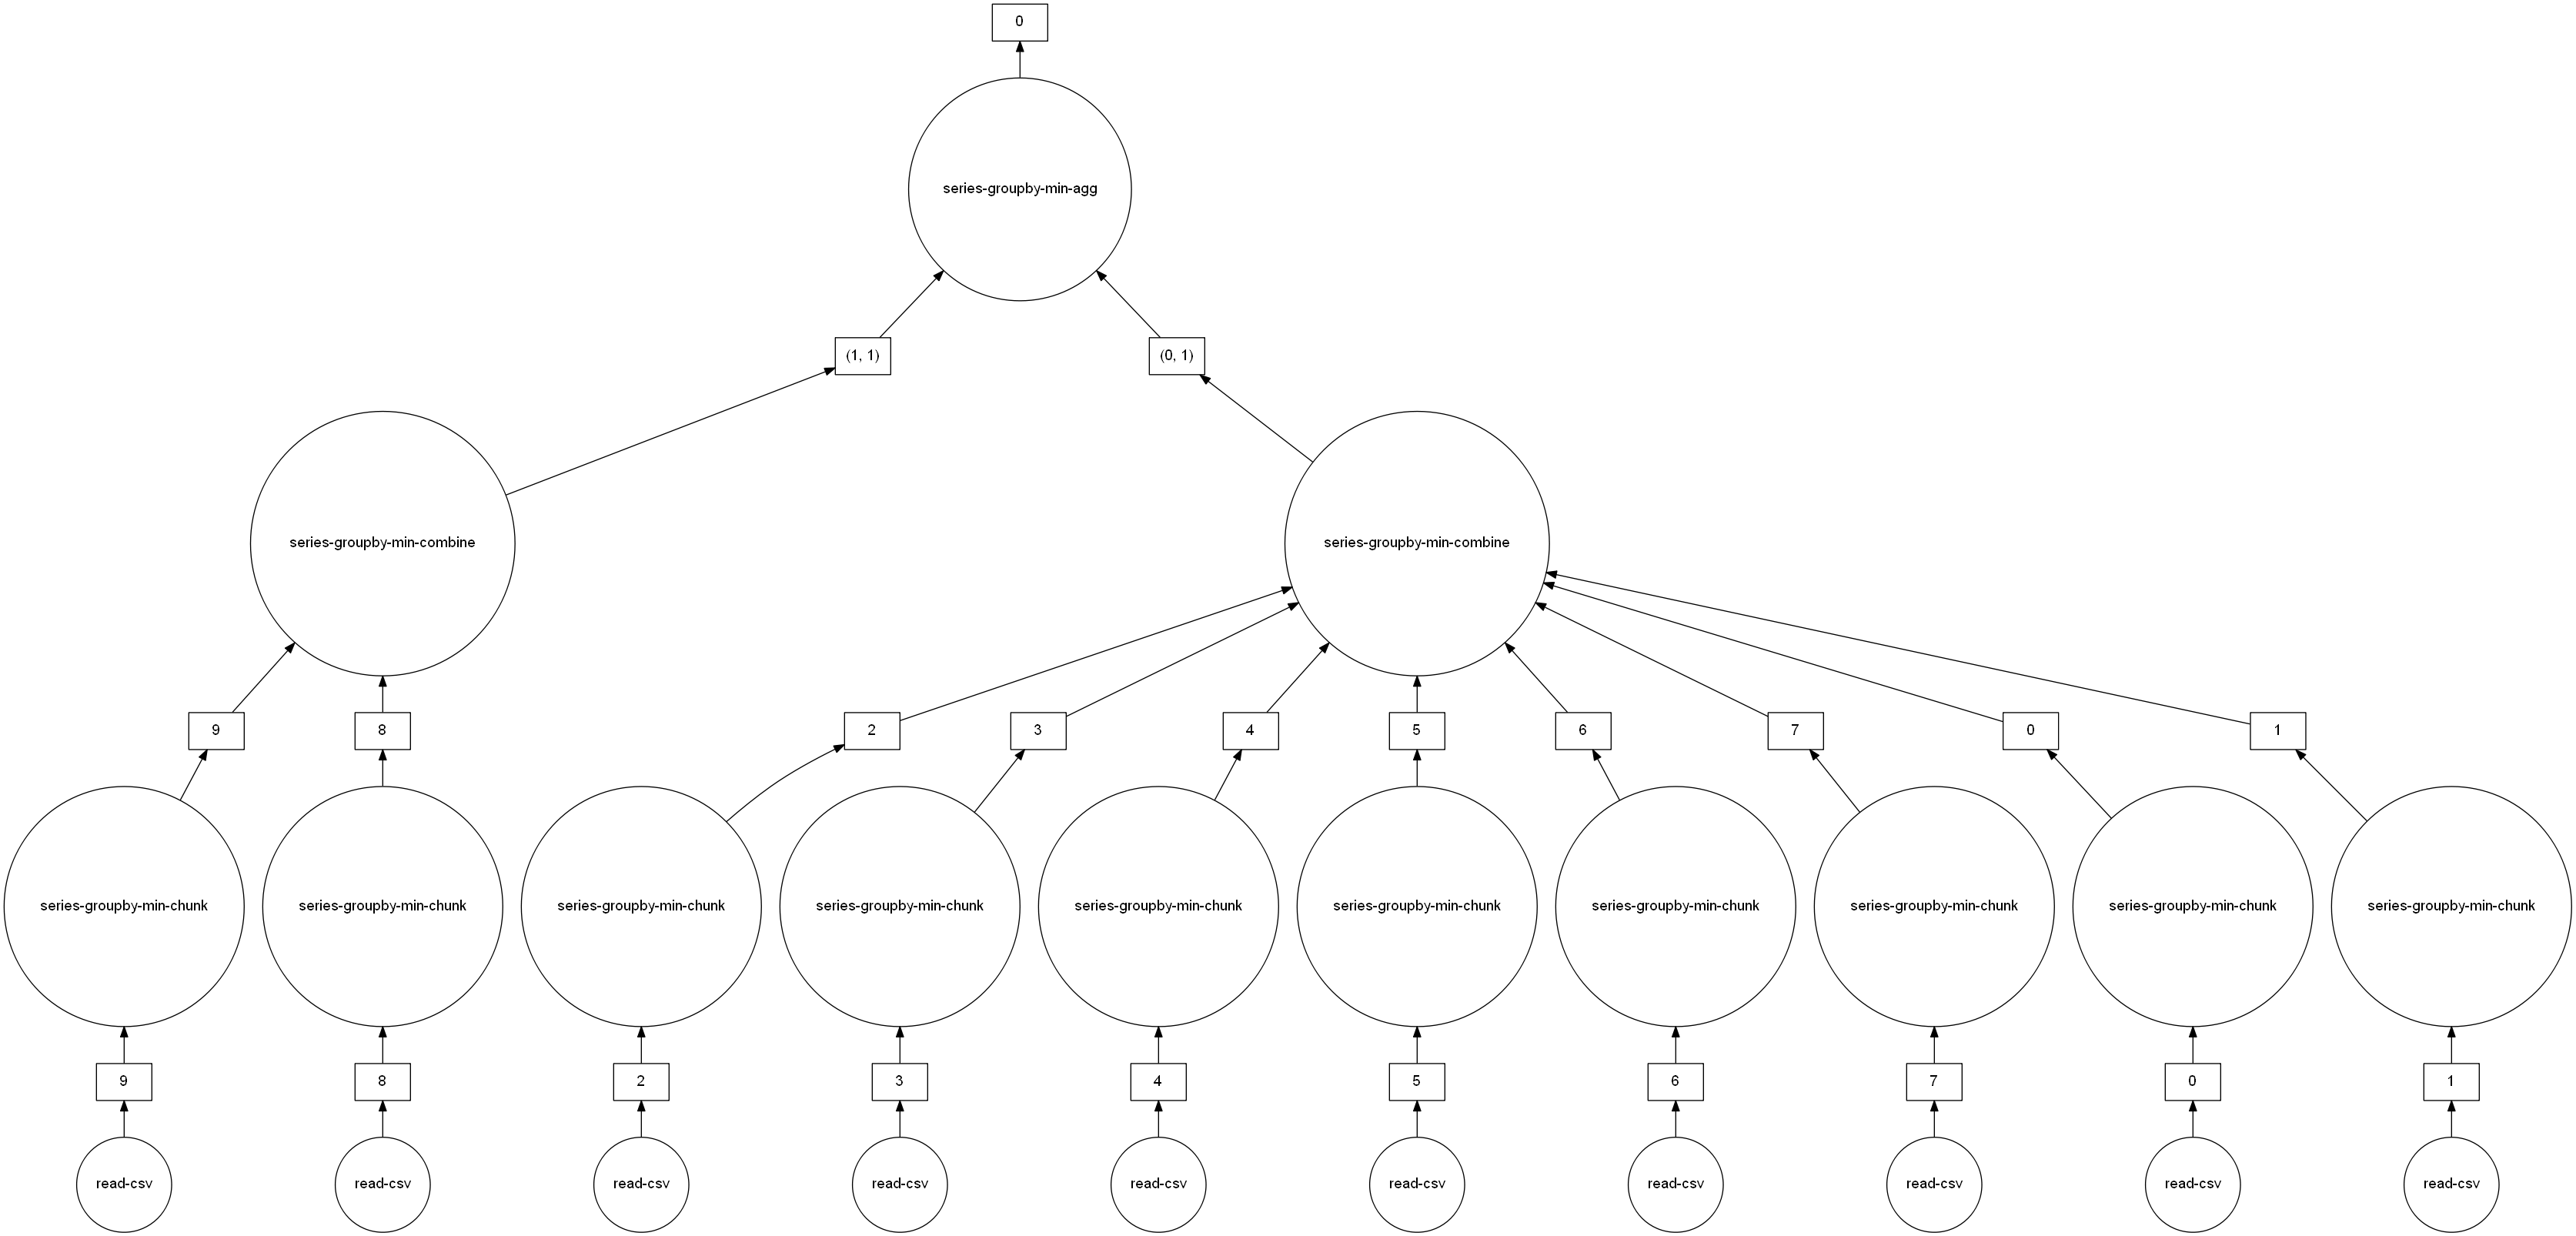

In [24]:
ddf.groupby('Dest')['ArrDelay'].min().visualize()

## 11. Distributed Task Scheduler

In [49]:
from dask.distributed import Client

client=Client(n_workers=14, threads_per_worker=2,memory_limit='1GB')
print(client)
client.cluster

<Client: 'tcp://127.0.0.1:59806' processes=14 threads=28, memory=13.04 GiB>


In [26]:
#live progress of computations
from dask.diagnostics import ProgressBar

ProgressBar().register()

In [27]:
ddf.groupby('Dest')['ArrDelay'].min().compute()

Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

## 12. Use a Different Scheduler for specific tasks

In [28]:
x=ddf.groupby('Dest')['ArrDelay'].min()
#specific comand in diferent scheduler= Threads fasper for pandas and numpy

x.compute(sheduler='threads')

Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

In [29]:
# multiple lines using different scheduler =Processes better for python tasks
with dask.config.set(scheduler='processes'):
    print(x.compute())

[########################################] | 100% Completed |  4.0s
Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64


# Section E Machine Learning with Dask

## 1. Generate random Data

In [30]:
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=10000,n_features=4,random_state=0)

In [31]:
#some values from X and Y
print(X[:8])
print(y[:8])

[[-0.77244139  0.3607576  -2.38110133  0.08757   ]
 [ 1.14946035  0.62254594  0.37302939  0.45965795]
 [-1.90879217 -1.1602627  -0.27364545 -0.82766028]
 [-0.77694695  0.31434299 -2.26231851  0.06339125]
 [-1.17047054  0.02212382 -2.17376797 -0.13421976]
 [ 0.79010037  0.68530624 -0.44740487  0.44692959]
 [ 1.68616989  1.6329131  -1.42072654  1.04050557]
 [-0.93912893 -1.02270838  1.10093827 -0.63714432]]
[0 0 1 0 0 0 0 1]


## 2. Fit a Support Vector

In [32]:
#import model
from sklearn.svm import SVC

#creat estimator and fit to data
estimator=SVC(random_state=0)
estimator.fit(X,y)

# explore the leared parameters
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959]])

In [33]:
#mean classification accuracy on training data
estimator.score(X,y)

0.905

## 3. Hyperparameter tuning

In [34]:
#setting paramenter up front
estimator=SVC(C=0.00001,shrinking=False,random_state=0)
estimator.fit(X,y)
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976]])

In [35]:
#accuracy
estimator.score(X,y)

0.5007

## 4. GridSearchCV on a single Core
Search hyperparameters using brute force

In [36]:
#initial hyperparameters no tuning
from sklearn.model_selection import GridSearchCV

estimator=SVC(gamma='auto',random_state=0,probability=True)
#hyperparameter to be tuned 
param_grid={
    'C':[0.001,10.0],
    'kernel':['rbf','poly'],
}
#instance and initialize a few hyperparameters
grid_search=GridSearchCV(estimator,param_grid,verbose=2,cv=2)



In [37]:
#lets time the fit of the model
%timeit grid_search.fit(X,y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ................................C=0.001, kernel=rbf; total time=   7.0s
[CV] END ................................C=0.001, kernel=rbf; total time=   7.0s
[CV] END ...............................C=0.001, kernel=poly; total time=   2.8s
[CV] END ...............................C=0.001, kernel=poly; total time=   2.8s
[CV] END .................................C=10.0, kernel=rbf; total time=   1.7s
[CV] END .................................C=10.0, kernel=rbf; total time=   1.8s
[CV] END ................................C=10.0, kernel=poly; total time=   2.6s
[CV] END ................................C=10.0, kernel=poly; total time=   2.3s
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ................................C=0.001, kernel=rbf; total time=   6.9s
[CV] END ................................C=0.001, kernel=rbf; total time=   6.8s
[CV] END ...............................C=0.001, kernel=poly; total time

## 5. Applying GridSearchCV on multicores Scikit parallelism using joblib

In [38]:
# initialize Joblib in a single-machin paralelism njobs-1 will run on all cores
grid_search_MC=GridSearchCV(estimator,param_grid,verbose=2,cv=2, n_jobs=-1)

In [39]:
#time the operation of fiting model with njobs
%timeit grid_search_MC.fit(X,y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
15.4 s ± 221 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
#wich are the best hyperparameters? grid search mc
grid_search_MC.best_params_,grid_search_MC.best_score_

({'C': 10.0, 'kernel': 'rbf'}, 0.9086000000000001)

In [41]:
#wich are the best hyperparameters? grid search
grid_search.best_params_,grid_search.best_score_

({'C': 10.0, 'kernel': 'rbf'}, 0.9086000000000001)

## 6. Paralelism with Dask 

In [42]:
#dask comunicates with Scikit using joblib

import joblib

param_grid={
    'C':[0.001,1.0,2.5,5.,10.0,100.,500.,1000],
    'kernel':['rbf','poly','linear'],
    'shrinking':[True,False]
}

In [43]:
#new grid search
grid_search_Dist=GridSearchCV(estimator,param_grid,verbose=2,cv=5, n_jobs=-1)

In [53]:
# run parallel job with joblib and dask 
#with to call the parallel backend

%time 
with joblib.parallel_backend('dask'):
            grid_search_Dist.fit(X,y)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [45]:
#lets see the out put of the crossvalidation

pd.DataFrame(grid_search_Dist.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,77.090199,39.766450,5.929200,2.889643,0.001,rbf,True,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': True}",0.8495,0.821,0.8350,0.8245,0.8320,0.8324,0.009917,29
1,43.819399,1.898002,3.767000,0.316211,0.001,rbf,False,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': False}",0.8495,0.821,0.8345,0.8245,0.8320,0.8323,0.009892,30
2,51.216599,15.609258,1.974599,0.686082,0.001,poly,True,"{'C': 0.001, 'kernel': 'poly', 'shrinking': True}",0.8095,0.785,0.8030,0.7975,0.8080,0.8006,0.008862,47
3,18.493400,0.723331,0.800601,0.104124,0.001,poly,False,"{'C': 0.001, 'kernel': 'poly', 'shrinking': Fa...",0.8095,0.785,0.8030,0.7980,0.8075,0.8006,0.008749,47
4,28.144203,10.704639,1.253597,0.474318,0.001,linear,True,"{'C': 0.001, 'kernel': 'linear', 'shrinking': ...",0.8390,0.813,0.8260,0.8120,0.8205,0.8221,0.009881,45


In [46]:
#hyperparameters and best scores
grid_search_Dist.best_params_,grid_search_Dist.best_score_

({'C': 500.0, 'kernel': 'rbf', 'shrinking': True}, 0.914)

In [47]:
#summary of  precision Meassures
y_pred=grid_search_Dist.predict(X)

from sklearn.metrics import classification_report
print (classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4993
           1       0.88      0.96      0.92      5007

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## 7. Close the Client

In [54]:
client.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
